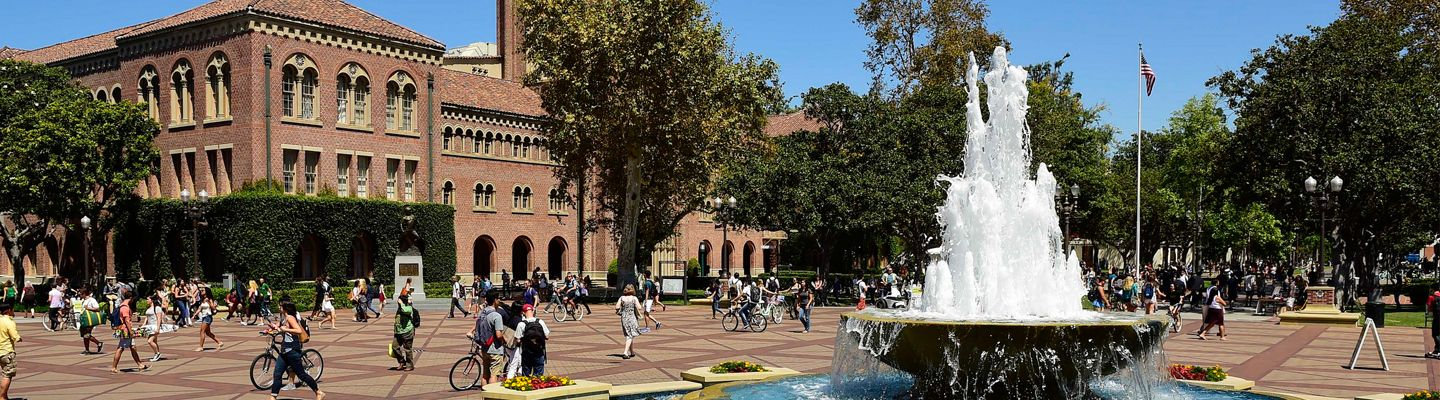

#**Credit Card Attrition Project**
---
Source: [Kaggle](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m)

**Import the file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import os

#**Data Cleaning and Preparation**

In [ ]:
#Read file as DataFrame
#File name - 'BankChurners.csv'
cd = pd.read_csv('BankChurners.csv')
cd.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
#Check columns and types
print(cd.columns)
print(cd.dtypes)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')
CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                             

In [ ]:
#Drop irrelevant columns
cd.drop([ 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis=1, inplace=True)

In [ ]:
#Check for missing values
missing_values = cd.isnull().sum()
print(missing_values)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [ ]:
#Describe Dataset
cd.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
#Exploring Attrition Counts
card_type_categ = cd['Attrition_Flag'].value_counts()
print(card_type_categ)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [ ]:
#Summary of existing and attrited customers
existing_customers_summary = cd[cd['Attrition_Flag'] == 'Existing Customer']['Avg_Utilization_Ratio'].describe()
attrited_customers_summary = cd[cd['Attrition_Flag'] == 'Attrited Customer']['Avg_Utilization_Ratio'].describe()
existing_customers_df = pd.DataFrame(existing_customers_summary).rename(columns={'Avg_Utilization_Ratio': 'Existing Customers'})
attrited_customers_df = pd.DataFrame(attrited_customers_summary).rename(columns={'Avg_Utilization_Ratio': 'Attrited Customers'})
summary_table = pd.concat([existing_customers_df, attrited_customers_df], axis=1)
print('Summary of Existing and Attrited customers\n')
print(summary_table)


Summary of Existing and Attrited customers

       Existing Customers  Attrited Customers
count         8500.000000         1627.000000
mean             0.296412            0.162475
std              0.272568            0.264458
min              0.000000            0.000000
25%              0.055000            0.000000
50%              0.211000            0.000000
75%              0.529250            0.231000
max              0.994000            0.999000


#**Exploring Customer Attrition Using Visualizations**

Boxplot of Average Utilization Ratio for Attrited and Existing Customers

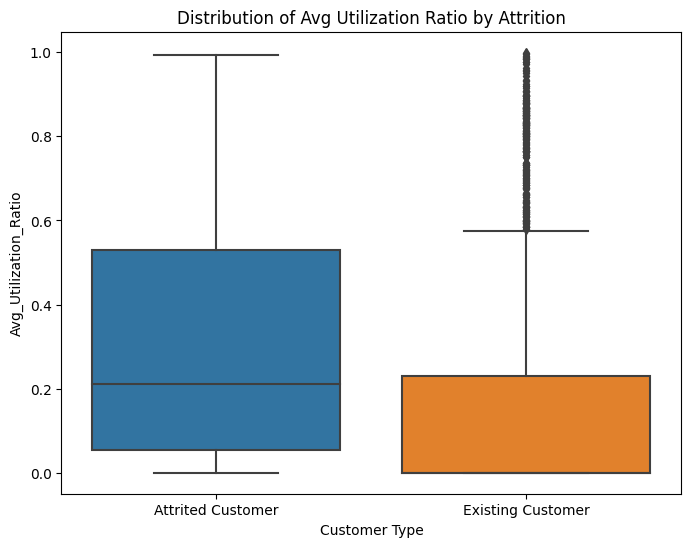

In [ ]:
#Boxplot of Average Utilization Ratio for Attrited and Existing Customers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=cd)
plt.title("Distribution of Avg Utilization Ratio by Attrition")
plt.xlabel("Customer Type")
plt.ylabel("Avg_Utilization_Ratio")
plt.xticks(ticks=[0, 1], labels=["Attrited Customer", "Existing Customer"])
plt.show()

Boxplot of Average Utilization Ratio by Income Level and Attrition

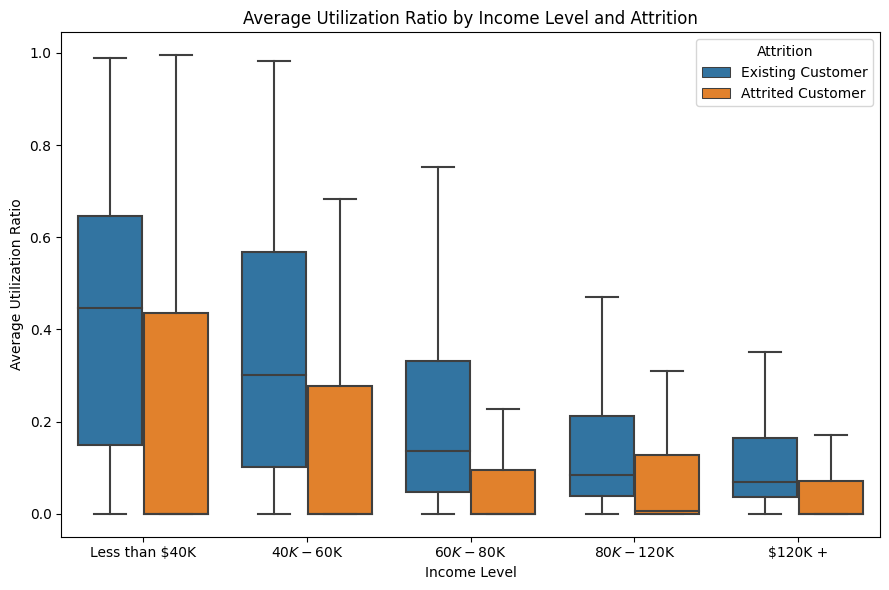

In [ ]:
#Boxplot of Average Utilization Ratio by Income Level and Attrition
income_order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
filtered_cd = cd[cd['Income_Category'] != 'Unknown']

plt.figure(figsize=(9, 6))
sns.boxplot(
    x='Income_Category',
    y='Avg_Utilization_Ratio',
    hue='Attrition_Flag',
    data=filtered_cd,
    showfliers=False,
    order=income_order
)
plt.title("Average Utilization Ratio by Income Level and Attrition")
plt.xlabel("Income Level")
plt.ylabel("Average Utilization Ratio")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
cd['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Boxplot of Average Utilization Ratio by Education Level and Attrition

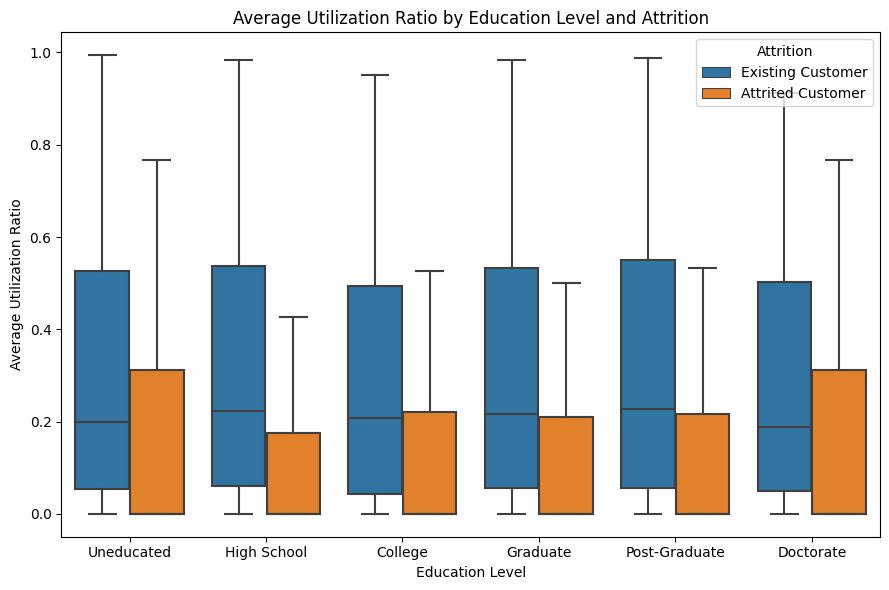

In [ ]:
#Boxplot of Average Utilization Ratio by Education Level and Attrition
education_order = ["Uneducated",'High School', 'College','Graduate', 'Post-Graduate', 'Doctorate' ]
filtered_cd_e = cd[cd['Education_Level'] != 'Unknown']

plt.figure(figsize=(9, 6))
sns.boxplot(x='Education_Level', y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=filtered_cd_e, showfliers=False, order=education_order)
plt.title("Average Utilization Ratio by Education Level and Attrition")
plt.xlabel("Education Level")
plt.ylabel("Average Utilization Ratio")
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()

Scatter Plot of Credit Limit vs. Avg Utilization Ratio

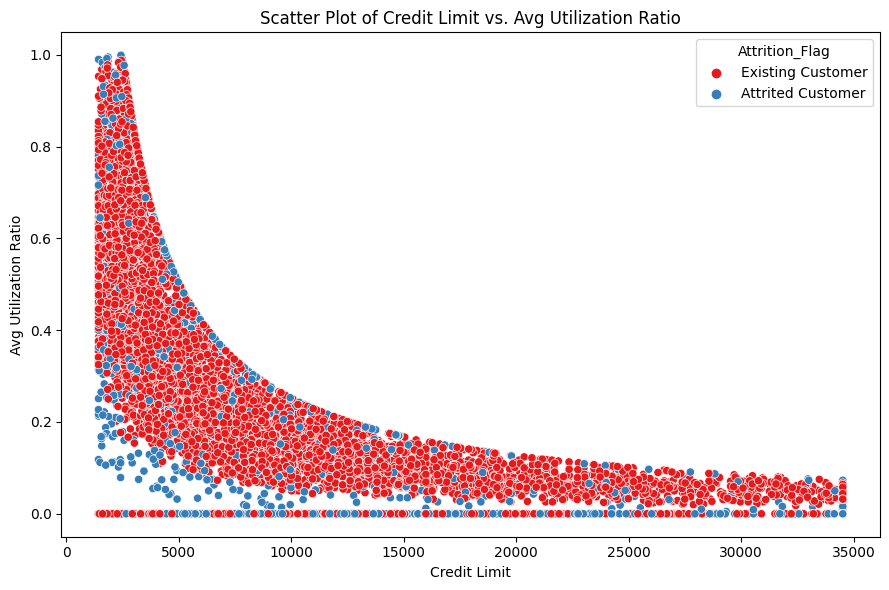

In [ ]:
#Scatter Plot of Credit Limit vs. Avg Utilization Ratio
plt.figure(figsize=(9, 6))
sns.scatterplot(data=cd, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag', palette='Set1')
plt.xlabel('Credit Limit')
plt.ylabel('Avg Utilization Ratio')
plt.title('Scatter Plot of Credit Limit vs. Avg Utilization Ratio')
plt.tight_layout()
plt.show()

Correlation Heatmap

#**Significance Testing**
Our problem statement: *Are users with higher credit card utilization ratio more likely to churn?*

Our hypothesis
*   $H_{0}$ The utilization ratio is not greater in attrited customers compared to existing customers.
*   $H_{A}$ The utilization ratio is greater in attrited customers compared to existing customers.

We are using $\alpha$ = 0.05

In [ ]:
from scipy.stats import ttest_ind

attrited_customers = cd[cd['Attrition_Flag'] == 'Attrited Customer']['Avg_Utilization_Ratio']
existing_customers = cd[cd['Attrition_Flag'] == 'Existing Customer']['Avg_Utilization_Ratio']

t_statistic, p_value = ttest_ind(attrited_customers, existing_customers, alternative='greater')

print(f"T-Statistic: {t_statistic:.3f}")
print(f"P-Value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The utilization ratio is higher in attrited customers compared to existing customers.")
else:
    print("Fail to reject the null hypothesis: There is \nno evidence that the utilization ratio is higher \nin attrited customers compared to existing customers.")


T-Statistic: -18.245
P-Value: 1.000
Fail to reject the null hypothesis: There is 
no evidence that the utilization ratio is higher 
in attrited customers compared to existing customers.


The p-value > $\alpha$ therefore there is no significant relationship between average utilization ratio and customer attrition.

The p value indicates there might be a significant relationship the opposite direction.

We can revise our hypothesis in the other direction and perform a t test:
*   $H_{0}$ The utilization ratio is not lower in attrited customers compared to existing customers.
*   $H_{A}$ The utilization ratio is lower in attrited customers compared to existing customers.

In [ ]:
from scipy.stats import ttest_ind

attrited_customers = cd[cd['Attrition_Flag'] == 'Attrited Customer']['Avg_Utilization_Ratio']
existing_customers = cd[cd['Attrition_Flag'] == 'Existing Customer']['Avg_Utilization_Ratio']

t_statistic, p_value = ttest_ind(attrited_customers, existing_customers, alternative='less')
print('New Hypothesis Test')
print("")
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The utilization \nratio is less in attrited customers compared to \nexisting customers.")
else:
    print("Fail to reject the null hypothesis: There is \nno evidence that the utilization ratio is less \nin attrited customers compared to existing customers.")


New Hypothesis Test

T-Statistic: -18.24
P-Value: 0.0000
Reject the null hypothesis: The utilization 
ratio is less in attrited customers compared to 
existing customers.


The p-value < $\alpha$ therefore there is a significant relationship between average utilization ratio and customer attrition.

As the average utilization ratio decreases and likelihood of customer attrition increases. This points towards attrition happening not as a result of negligent spending and not being able to pay back card fees, but instead to low credit card usage.




#**Logistic Regression Modelling: Predicting Customer Attrition With the Average Utiliziation Ratio**

We want to understand how useful the relationship between average utilziation ratio and customer attrition is. To do so we will investigate how useful average utilziation ratio is in predicting customer attrition.

Processing the dataset for a logisitc modelling - creating dummy variables for categorical variables and normalizing numerical variables

In [ ]:
#Create dummy variables and change Attrition_Flag from string to binary numerical
from sklearn.preprocessing import LabelEncoder, StandardScaler
temp = cd
le = LabelEncoder()
temp['Attrition_Flag'] = le.fit_transform(temp['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}))
temp = pd.get_dummies(temp, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

In [ ]:
#Normalize columns
numerical_columns = temp.select_dtypes(include=['int64', 'float64']).columns.difference(['Attrition_Flag'])
scaler = StandardScaler()
temp[numerical_columns] = scaler.fit_transform(temp[numerical_columns])
temp.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,...,0,0,0,1,0,0,0,0,0,0
1,0,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,...,1,0,0,0,0,1,0,0,0,0
2,0,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,...,0,0,0,0,1,0,0,0,0,0
3,0,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,...,0,1,0,0,0,1,0,0,0,0
4,0,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,...,0,0,0,1,0,0,0,0,0,0


Calculate the correlation matrix

In [ ]:
# Calculate the correlation matrix
correlation_matrix = temp.corr()
target_correlation = correlation_matrix['Attrition_Flag'].sort_values(ascending=False)
print(target_correlation)

Attrition_Flag                    1.000000
Contacts_Count_12_mon             0.204491
Months_Inactive_12_mon            0.152449
Education_Level_Doctorate         0.029386
Income_Category_Less than $40K    0.022466
Marital_Status_Single             0.019037
Dependent_count                   0.018991
Customer_Age                      0.018203
Months_on_book                    0.013687
Education_Level_Post-Graduate     0.011127
Card_Category_Platinum            0.010823
Education_Level_Unknown           0.009005
Marital_Status_Unknown            0.008904
Income_Category_Unknown           0.007179
Card_Category_Gold                0.005973
Avg_Open_To_Buy                  -0.000285
Education_Level_Uneducated       -0.001444
Income_Category_$80K - $120K     -0.003459
Card_Category_Silver             -0.008467
Education_Level_Graduate         -0.009046
Income_Category_$40K - $60K      -0.011688
Education_Level_High School      -0.011730
Marital_Status_Married           -0.023735
Credit_Limi

Separate features and target variable

In [ ]:
# Separate features and target variable
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
df = temp
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,0,0,0,1,0,0,0,0,0,0
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,1,0,0,0,0,1,0,0,0,0
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,0,0,0,0,1,0,0,0,0,0
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,0,1,0,0,0,1,0,0,0,0
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,0,0,0,1,0,0,0,0,0,0


Calculate the Variance Inflation Factor

In [ ]:
#Calculate the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = X.copy()
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                          Variable       VIF
0                     Customer_Age  2.690555
1                  Dependent_count  1.042286
2                   Months_on_book  2.661011
3         Total_Relationship_Count  1.158804
4           Months_Inactive_12_mon  1.012537
5            Contacts_Count_12_mon  1.038618
6                     Credit_Limit       inf
7              Total_Revolving_Bal       inf
8                  Avg_Open_To_Buy       inf
9             Total_Amt_Chng_Q4_Q1  1.195931
10                 Total_Trans_Amt  3.314560
11                  Total_Trans_Ct  3.105168
12             Total_Ct_Chng_Q4_Q1  1.210088
13           Avg_Utilization_Ratio  3.002455
14                        Gender_M  4.892345
15       Education_Level_Doctorate  1.360209
16        Education_Level_Graduate  3.541986
17     Education_Level_High School  2.633705
18   Education_Level_Post-Graduate  1.422995
19      Education_Level_Uneducated  2.185861
20         Education_Level_Unknown  2.223565
21        

In [ ]:
cd['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Remove collinear columns and unknown columns

In [ ]:
columns_to_drop = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Marital_Status_Unknown', 'Education_Level_Unknown', 'Income_Category_Unknown']
X_new = X.drop(columns=columns_to_drop)

def calculate_vif(data_frame):
    vif = pd.DataFrame()
    vif["Variable"] = data_frame.columns
    vif["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif
vif_new = calculate_vif(X_new)
print(vif_new)

                          Variable       VIF
0                     Customer_Age  2.684713
1                  Dependent_count  1.034688
2                   Months_on_book  2.659034
3         Total_Relationship_Count  1.158257
4           Months_Inactive_12_mon  1.010561
5            Contacts_Count_12_mon  1.038252
6             Total_Amt_Chng_Q4_Q1  1.195642
7                  Total_Trans_Amt  3.256338
8                   Total_Trans_Ct  3.084280
9              Total_Ct_Chng_Q4_Q1  1.208394
10           Avg_Utilization_Ratio  1.195491
11                        Gender_M  3.865424
12       Education_Level_Doctorate  1.128052
13        Education_Level_Graduate  1.937143
14     Education_Level_High School  1.597634
15   Education_Level_Post-Graduate  1.157416
16      Education_Level_Uneducated  1.422800
17          Marital_Status_Married  2.842326
18           Marital_Status_Single  2.546454
19     Income_Category_$40K - $60K  1.672550
20     Income_Category_$60K - $80K  2.084795
21    Inco

In [ ]:
X_new = X_new.astype(float)

In [ ]:
X2=X
columns_to_drop = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Marital_Status_Unknown', 'Education_Level_Unknown', 'Income_Category_Unknown']
X2 = X2.drop(columns=columns_to_drop)
X2.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,2.623494,-0.959707,-0.973895,3.834003,...,0,1,0,0,1,0,0,0,0,0
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,3.563293,-0.916433,-1.357340,12.608573,...,0,0,1,0,0,0,1,0,0,0
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,8.367214,-0.740982,-1.911206,6.807864,...,0,1,0,0,0,1,0,0,0,0
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,2.942843,-0.951758,-1.911206,6.807864,...,0,0,0,0,0,0,1,0,0,0
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,6.455682,-1.056263,-1.570365,7.509325,...,1,1,0,0,1,0,0,0,0,0


Initialize the Logistic Regression model

In [ ]:
#Initialize the Logistic Regression model
logreg_model = LogisticRegression()
rfe = RFE(logreg_model, n_features_to_select=29)
rfe.fit(X2, y)

selected_features = X2.columns[rfe.support_]
selected_features = selected_features.union(['Avg_Utilization_Ratio'])


In [ ]:
len(selected_features)

26

Split the data into training and testing sets. Initialize the Logistic Regression model. Fit the model on training data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X2[selected_features], y, test_size=0.20, random_state=42)
logreg_model = LogisticRegression(class_weight='balanced')
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

coefficients = logreg_model.coef_[0]
intercept = logreg_model.intercept_[0]
feature_names = X_train.columns
print(logreg_model.coef_)
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df_sorted)

[[-0.62908508  0.16959767  0.21958958 -0.36217354  0.58611641  0.06212557
   0.12631681  0.36876521  0.01089525 -0.01809348  0.30545496  0.0787755
  -0.75759353  0.02375851  0.06394974  0.12462621  0.28252572 -0.39447881
   0.16777907  0.55728578 -0.16242687 -0.16263651 -0.59655016 -0.56693218
   1.7162851  -2.98148651]]
                           Feature  Coefficient  Abs_Coefficient
25                  Total_Trans_Ct    -2.981487         2.981487
24                 Total_Trans_Amt     1.716285         1.716285
12                        Gender_M    -0.757594         0.757594
0            Avg_Utilization_Ratio    -0.629085         0.629085
22             Total_Ct_Chng_Q4_Q1    -0.596550         0.596550
4            Contacts_Count_12_mon     0.586116         0.586116
23        Total_Relationship_Count    -0.566932         0.566932
19          Months_Inactive_12_mon     0.557286         0.557286
17          Marital_Status_Married    -0.394479         0.394479
7        Education_Level_Do

Evaluate accuracy, classification report, ROC AUC score and confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8351431391905232
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1699
           1       0.49      0.81      0.61       327

    accuracy                           0.84      2026
   macro avg       0.73      0.83      0.75      2026
weighted avg       0.88      0.84      0.85      2026

ROC AUC Score: 0.8251516902369265
Confusion Matrix:
 [[1427  272]
 [  62  265]]


Using the stats model package for the regression summary with coefficients and p values for each variable.

In [ ]:
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X2[selected_features], y, test_size=0.25, random_state=42)
X_train = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.239326
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                 7595
Model:                          Logit   Df Residuals:                     7568
Method:                           MLE   Df Model:                           26
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                  0.4537
Time:                        04:25:30   Log-Likelihood:                -1817.7
converged:                       True   LL-Null:                       -3327.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.5412      0.180    -14.124     

We can see the Avg_Utilization_Ratio is statistically significant and useful in predicitng customer attrition. The direction of significance from out t-tests conclusion are reinforced by this output.

Create a Precision-Recall Curve

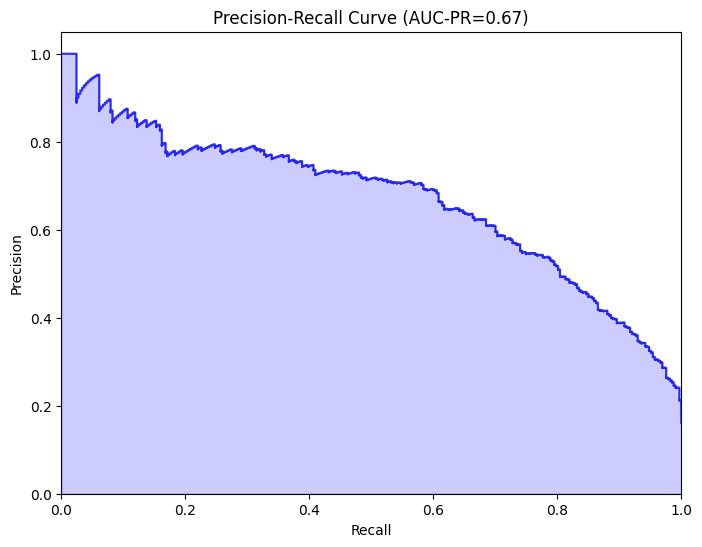

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.20, random_state=42)
logreg_model = LogisticRegression(class_weight='balanced')
logreg_model.fit(X_train, y_train)

y_scores = logreg_model.predict_proba(X_test)[:, 1]
y_test_bin = label_binarize(y_test, classes=[0, 1])

precision, recall, _ = precision_recall_curve(y_test_bin, y_scores)
average_precision = average_precision_score(y_test_bin, y_scores)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.8, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AUC-PR={:.2f})'.format(average_precision))
plt.show()

In [ ]:
print(len(y_test))
print(len(y_pred))

2026
2026


Create a confusion matrix

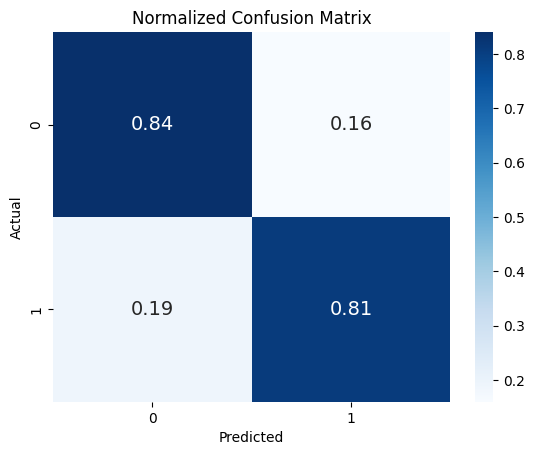

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm / cm.sum(axis=1, keepdims=True)

sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

Graph the coefficients of the variables from the logistic regression

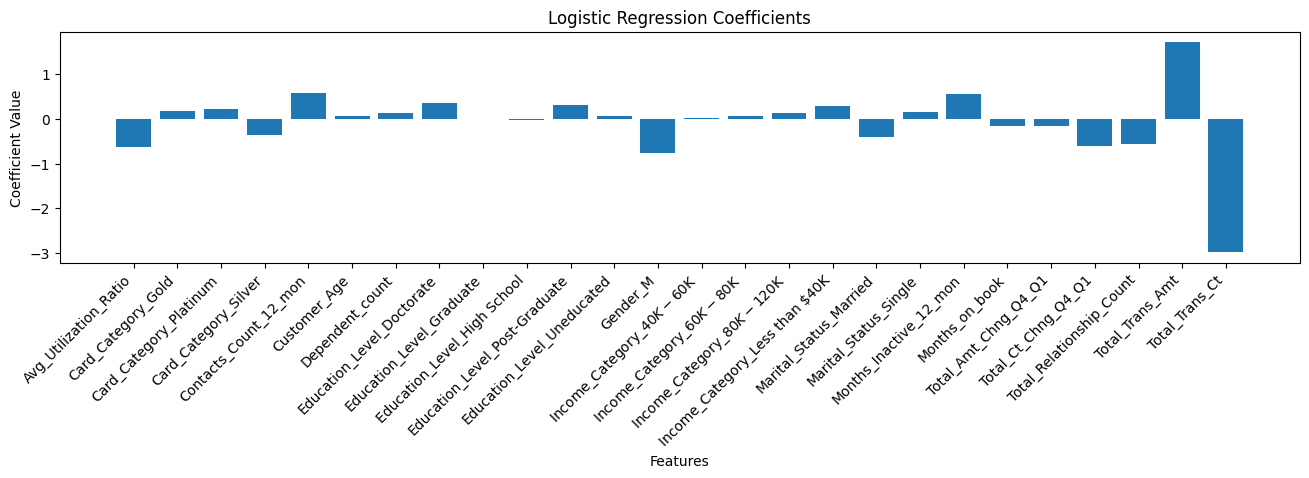

In [ ]:
feature_names = selected_features
coefficients = logreg_model.coef_[0]


plt.figure(figsize=(16, 3))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45, ha='right')
plt.show()

The average utilization ratio has the 4th largest impact on predicting the log odds of customer attrition.